In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from natsort import natsorted
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib
from matplotlib import pyplot as plt
import datetime
import pytz # https://stackoverflow.com/questions/15307623/cant-compare-naive-and-aware-datetime-now-challenge-datetime-end

In [43]:
plt.style.available   

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'bright',
 'cjk-jp-font',
 'cjk-kr-font',
 'cjk-sc-font',
 'cjk-tc-font',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'grid',
 'high-contrast',
 'high-vis',
 'ieee',
 'latex-sans',
 'light',
 'muted',
 'nature',
 'no-latex',
 'notebook',
 'pgf',
 'retro',
 'russian-font',
 'scatter',
 'science',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'std-colors',
 'tableau-colorblind10',
 'vibrant']

In [44]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'  

In [45]:
plt.style.use('science')

In [46]:
save_dir = "./Image"

In [47]:
df_ticker = pd.read_csv("./dataticker.csv")
df_trade = pd.read_csv("./trade.csv")
df_order_book = pd.read_csv("./order_book_time.csv")

df_trade["timestamp"] = pd.to_datetime(df_trade["timestamp"])
df_trade = df_trade.set_index("timestamp")

df_ticker = df_ticker.drop(columns=df_ticker.columns[0])

In [48]:
df_ticker

last      buy     sell      mid
0      30414.0  30402.0  30414.0  30408.0
1      30414.0  30402.0  30414.0  30408.0
2      30414.0  30402.0  30414.0  30408.0
3      30414.0  30402.0  30414.0  30408.0
4      30414.0  30402.0  30414.0  30408.0
...        ...      ...      ...      ...
79569  31508.0  31586.0  31602.0  31594.0
79570  31508.0  31586.0  31602.0  31594.0
79571  31508.0  31586.0  31602.0  31594.0
79572  31508.0  31586.0  31602.0  31594.0
79573  31508.0  31586.0  31602.0  31594.0

[79574 rows x 4 columns]

In [49]:
df_trade

date             time  symbol side  \
timestamp                                                                    
2022-05-30 12:50:16.726000+00:00  2022-05-30  12:50:16.726000  XBTUSD  Buy   
2022-05-30 12:50:46.096000+00:00  2022-05-30  12:50:46.096000  XBTUSD  Buy   
2022-05-30 12:51:16.676000+00:00  2022-05-30  12:51:16.676000  XBTUSD  Buy   
2022-05-30 12:51:16.682000+00:00  2022-05-30  12:51:16.682000  XBTUSD  Buy   
2022-05-30 12:52:16.799000+00:00  2022-05-30  12:52:16.799000  XBTUSD  Buy   
...                                      ...              ...     ...  ...   
2022-06-06 15:53:55.689000+00:00  2022-06-06  15:53:55.689000  XBTUSD  Buy   
2022-06-06 15:53:59.939000+00:00  2022-06-06  15:53:59.939000  XBTUSD  Buy   
2022-06-06 15:59:16.758000+00:00  2022-06-06  15:59:16.758000  XBTUSD  Buy   
2022-06-06 16:00:09.090000+00:00  2022-06-06  16:00:09.090000  XBTUSD  Buy   
2022-06-06 16:00:46.993000+00:00  2022-06-06  16:00:46.993000  XBTUSD  Buy   

                                  size    price  tickDirection  \
timestamp                                                        
2022-05-30 12:50:16.726000+00:00   100  30413.5  ZeroMinusTick   
2022-05-30 12:50:46.096000+00:00   600  30413.5  ZeroMinusTick   
2022-05-30 12:51:16.676000+00:00   100  30413.5  ZeroMinusTick   
2022-05-30 12:51:16.682000+00:00   100  30413.5  ZeroMinusTick   
2022-05-30 12:52:16.799000+00:00   100  30413.5  ZeroMinusTick   
...                                ...      ...            ...   
2022-06-06 15:53:55.689000+00:00   100  31498.0       PlusTick   
2022-06-06 15:53:59.939000+00:00   100  31500.0       PlusTick   
2022-06-06 15:59:16.758000+00:00   100  31495.0      MinusTick   
2022-06-06 16:00:09.090000+00:00   200  31508.0       PlusTick   
2022-06-06 16:00:46.993000+00:00   100  31508.0   ZeroPlusTick   

                                                            trdMatchID  \
timestamp                                                                
2022-05-30 12:50:16.726000+00:00  d51d902e-24cc-4730-71ab-63d761b1d622   
2022-05-30 12:50:46.096000+00:00  da91c0b6-4174-9df9-5f42-7b189ed742c7   
2022-05-30 12:51:16.676000+00:00  f2bb5adb-f01e-0f0c-9f7e-e4dd2f145149   
2022-05-30 12:51:16.682000+00:00  f5fbb3c3-13ee-1d3d-23dd-4acf53eed3c7   
2022-05-30 12:52:16.799000+00:00  7ab021e2-e0a4-51a8-78f6-c818c802fb08   
...                                                                ...   
2022-06-06 15:53:55.689000+00:00  9957df10-0241-c85f-aff4-8cd28a627351   
2022-06-06 15:53:59.939000+00:00  55df4ecd-451e-0e42-e790-8e6b807a8122   
2022-06-06 15:59:16.758000+00:00  91b939f4-03c9-5a87-e7d5-aead6539b868   
2022-06-06 16:00:09.090000+00:00  2aa96ae7-d79e-c9d8-a69b-fb7c80333ded   
2022-06-06 16:00:46.993000+00:00  fd220186-9f21-74a8-4c05-2ba3fc78a97b   

                                  grossValue  homeNotional  foreignNotional  
timestamp                                                                    
2022-05-30 12:50:16.726000+00:00      328801      0.003288              100  
2022-05-30 12:50:46.096000+00:00     1972806      0.019728              600  
2022-05-30 12:51:16.676000+00:00      328801      0.003288              100  
2022-05-30 12:51:16.682000+00:00      328801      0.003288              100  
2022-05-30 12:52:16.799000+00:00      328801      0.003288              100  
...                                      ...           ...              ...  
2022-06-06 15:53:55.689000+00:00      317480      0.003175              100  
2022-06-06 15:53:59.939000+00:00      317460      0.003175              100  
2022-06-06 15:59:16.758000+00:00      317511      0.003175              100  
2022-06-06 16:00:09.090000+00:00      634760      0.006348              200  
2022-06-06 16:00:46.993000+00:00      317380      0.003174              100  

[13375 rows x 11 columns]

In [50]:
df_order_book

timestamp     Bid0     Bid1     Bid2     Bid3  \
0      2022-05-30T12:50:27.507000000  30402.5  30402.0  30380.0  30329.5   
1      2022-05-30T12:50:27.507000000  30402.5  30402.0  30380.0  30329.5   
2      2022-05-30T12:50:27.507000000  30402.5  30402.0  30380.0  30329.5   
3      2022-05-30T12:50:47.119000000  30402.5  30402.0  30380.0  30329.5   
4      2022-05-30T12:50:47.119000000  30402.5  30402.0  30380.0  30329.5   
...                              ...      ...      ...      ...      ...   
79570  2022-06-06T16:02:16.812000000  31586.5  31523.0  31509.0  31496.0   
79571  2022-06-06T16:02:16.812000000  31586.5  31523.0  31509.0  31496.0   
79572  2022-06-06T16:02:16.812000000  31586.5  31523.0  31509.0  31496.0   
79573  2022-06-06T16:02:16.812000000  31586.5  31523.0  31509.0  31496.0   
79574  2022-06-06T16:02:16.812000000  31586.5  31523.0  31509.0  31496.0   

          Bid4     Bid5     Bid6     Bid7     Bid8  ...  Asksize0  Asksize1  \
0      30328.5  30320.0  30298.0  30279.0  30267.5  ...    4800.0     500.0   
1      30328.5  30320.0  30298.0  30279.0  30267.5  ...    4800.0     500.0   
2      30328.5  30320.0  30298.0  30279.0  30267.5  ...    4800.0     500.0   
3      30328.5  30320.0  30298.0  30279.0  30267.5  ...    4200.0     500.0   
4      30328.5  30320.0  30298.0  30279.0  30267.5  ...    4200.0     500.0   
...        ...      ...      ...      ...      ...  ...       ...       ...   
79570  31488.5  31476.5  31466.0  31465.0  31460.5  ...  169700.0     300.0   
79571  31488.5  31476.5  31466.0  31465.0  31460.5  ...  169700.0     300.0   
79572  31488.5  31476.5  31466.0  31465.0  31460.5  ...  169700.0     300.0   
79573  31488.5  31476.5  31466.0  31465.0  31460.5  ...  169700.0     300.0   
79574  31488.5  31476.5  31466.0  31465.0  31460.5  ...  169700.0     300.0   

       Asksize2  Asksize3  Asksize4  Asksize5  Asksize6  Asksize7  Asksize8  \
0        5700.0  106400.0     100.0     100.0  106800.0     300.0     100.0   
1        5700.0  106400.0     100.0     100.0  106800.0     300.0     100.0   
2        5700.0  106400.0     100.0     100.0  106800.0     300.0     100.0   
3        5700.0  106400.0     100.0     100.0     300.0     100.0  106900.0   
4        5700.0  106400.0     100.0     100.0     300.0     100.0  106900.0   
...         ...       ...       ...       ...       ...       ...       ...   
79570     100.0     100.0    1000.0  104800.0    1000.0  113400.0  113600.0   
79571     100.0     100.0    1000.0  104800.0    1000.0  113400.0  113600.0   
79572     100.0     100.0    1000.0  104800.0    1000.0  113400.0  113600.0   
79573     100.0     100.0    1000.0  104800.0    1000.0  113400.0  113600.0   
79574     100.0     100.0    1000.0  104800.0    1000.0  113400.0  113600.0   

       Asksize9  
0      106900.0  
1      106900.0  
2      106900.0  
3      107000.0  
4      107000.0  
...         ...  
79570     100.0  
79571     100.0  
79572     100.0  
79573     100.0  
79574     100.0  

[79575 rows x 41 columns]

df_ticker,df_trade,df_order_book

In [53]:
time_start = datetime.datetime(2022, 5, 31, 0,tzinfo=pytz.UTC)  
time_end = datetime.datetime(2022, 6, 4, 0,tzinfo=pytz.UTC)   

原始数据的时区是UTC


In [54]:
time_start

datetime.datetime(2022, 5, 31, 0, 0, tzinfo=<UTC>)

In [55]:

df_trade.index = pd.DatetimeIndex(df_trade.index)

In [56]:

df_trade_split = df_trade[(df_trade.index > time_start)&(df_trade.index < time_end)]

In [57]:
df_trade_split.head(20)

date             time  symbol  side  \
timestamp                                                                     
2022-05-31 01:02:51.096000+00:00  2022-05-31  01:02:51.096000  XBTUSD   Buy   
2022-05-31 01:05:06.391000+00:00  2022-05-31  01:05:06.391000  XBTUSD   Buy   
2022-05-31 01:05:33.394000+00:00  2022-05-31  01:05:33.394000  XBTUSD  Sell   
2022-05-31 01:05:47.096000+00:00  2022-05-31  01:05:47.096000  XBTUSD  Sell   
2022-05-31 01:05:55.858000+00:00  2022-05-31  01:05:55.858000  XBTUSD  Sell   
2022-05-31 01:07:04.934000+00:00  2022-05-31  01:07:04.934000  XBTUSD   Buy   
2022-05-31 01:07:47.576000+00:00  2022-05-31  01:07:47.576000  XBTUSD  Sell   
2022-05-31 01:10:06.537000+00:00  2022-05-31  01:10:06.537000  XBTUSD   Buy   
2022-05-31 01:10:16.746000+00:00  2022-05-31  01:10:16.746000  XBTUSD  Sell   
2022-05-31 01:10:16.753000+00:00  2022-05-31  01:10:16.753000  XBTUSD  Sell   
2022-05-31 03:05:59.166000+00:00  2022-05-31  03:05:59.166000  XBTUSD   Buy   
2022-05-31 03:08:16.725000+00:00  2022-05-31  03:08:16.725000  XBTUSD   Buy   
2022-05-31 03:09:16.742000+00:00  2022-05-31  03:09:16.742000  XBTUSD   Buy   
2022-05-31 03:09:16.749000+00:00  2022-05-31  03:09:16.749000  XBTUSD   Buy   
2022-05-31 03:10:06.666000+00:00  2022-05-31  03:10:06.666000  XBTUSD   Buy   
2022-05-31 03:10:16.734000+00:00  2022-05-31  03:10:16.734000  XBTUSD   Buy   
2022-05-31 03:10:16.742000+00:00  2022-05-31  03:10:16.742000  XBTUSD   Buy   
2022-05-31 03:10:30.289000+00:00  2022-05-31  03:10:30.289000  XBTUSD  Sell   
2022-05-31 03:15:07.027000+00:00  2022-05-31  03:15:07.027000  XBTUSD   Buy   
2022-05-31 03:15:16.690000+00:00  2022-05-31  03:15:16.690000  XBTUSD   Buy   

                                  size    price  tickDirection  \
timestamp                                                        
2022-05-31 01:02:51.096000+00:00   100  31553.0      MinusTick   
2022-05-31 01:05:06.391000+00:00   100  31581.5       PlusTick   
2022-05-31 01:05:33.394000+00:00   100  31544.0      MinusTick   
2022-05-31 01:05:47.096000+00:00   200  31544.0  ZeroMinusTick   
2022-05-31 01:05:55.858000+00:00   100  31544.0  ZeroMinusTick   
2022-05-31 01:07:04.934000+00:00   100  31575.5       PlusTick   
2022-05-31 01:07:47.576000+00:00   400  31544.0      MinusTick   
2022-05-31 01:10:06.537000+00:00   100  31546.0       PlusTick   
2022-05-31 01:10:16.746000+00:00   100  31544.0      MinusTick   
2022-05-31 01:10:16.753000+00:00   100  31544.0  ZeroMinusTick   
2022-05-31 03:05:59.166000+00:00   400  31730.0       PlusTick   
2022-05-31 03:08:16.725000+00:00   100  31730.0   ZeroPlusTick   
2022-05-31 03:09:16.742000+00:00   100  31730.0   ZeroPlusTick   
2022-05-31 03:09:16.749000+00:00   100  31730.0   ZeroPlusTick   
2022-05-31 03:10:06.666000+00:00   100  31730.0   ZeroPlusTick   
2022-05-31 03:10:16.734000+00:00   100  31730.0   ZeroPlusTick   
2022-05-31 03:10:16.742000+00:00   100  31730.0   ZeroPlusTick   
2022-05-31 03:10:30.289000+00:00   100  31645.0      MinusTick   
2022-05-31 03:15:07.027000+00:00   100  31730.0       PlusTick   
2022-05-31 03:15:16.690000+00:00   100  31730.0   ZeroPlusTick   

                                                            trdMatchID  \
timestamp                                                                
2022-05-31 01:02:51.096000+00:00  e5a9bff6-b9bb-32ff-796e-b2565fcff73e   
2022-05-31 01:05:06.391000+00:00  4cba8821-4b2b-efc1-9b3c-f10d545e3fb5   
2022-05-31 01:05:33.394000+00:00  597530d4-5f27-c120-eb67-db7640c64d02   
2022-05-31 01:05:47.096000+00:00  6f460707-ab90-aa01-c80a-b1523c36897b   
2022-05-31 01:05:55.858000+00:00  dc70a11b-6aaa-3027-1f5c-46227e72d184   
2022-05-31 01:07:04.934000+00:00  991ba5f0-ee88-0b95-f4e5-42d9dbb92590   
2022-05-31 01:07:47.576000+00:00  edd610a2-b608-39f6-e8b7-cc68e4ea9146   
2022-05-31 01:10:06.537000+00:00  f2b7f8aa-3fec-930b-3540-bdcf73cf0c8b   
2022-05-31 01:10:16.746000+00:00  e5768c9e-02d8-f6da-472d-558884cb6136   
2022-05-31 01:10:16.753000+00:00  

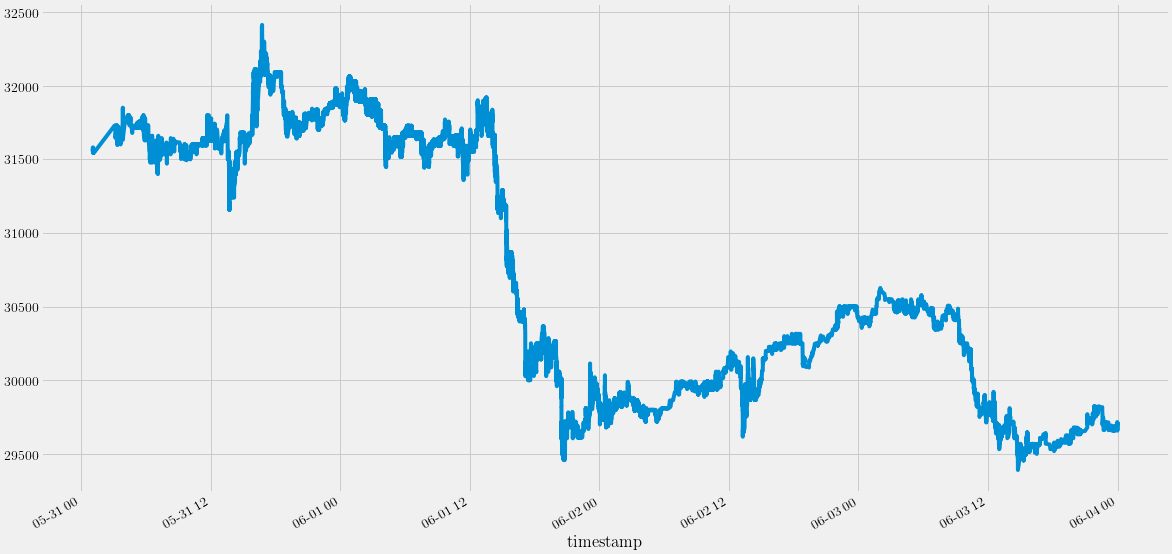

In [58]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,10))
    df_trade_split["price"].plot()
    fig_file = os.path.join(save_dir, "01-trade.png")
    plt.savefig(fig_file, dpi=600, bbox_inches='tight', pad_inches=0.2)
    plt.savefig(fig_file.replace('.png', '.tif'), dpi=600, bbox_inches='tight', pad_inches=0.2,
                pil_kwargs={"compression": "tiff_lzw"})
    plt.savefig(fig_file.replace('.png', '.svg'), format='svg', bbox_inches='tight', pad_inches=0.2)
    plt.show()

In [59]:
df_order_book = df_order_book.set_index("timestamp")

df_order_book.index = pd.DatetimeIndex(df_order_book.index)
df_order_book.index = df_order_book.index.tz_localize('UTC')

In [60]:

df_order_book.index.tzinfo

<UTC>

In [61]:

df_order_book_split = df_order_book[(df_order_book.index > time_start)&(df_order_book.index < time_end)]
df_order_book_split

Bid0     Bid1     Bid2     Bid3     Bid4  \
timestamp                                                                       
2022-05-31 01:03:22.747000+00:00  31544.0  31512.5  31508.0  31500.5  31500.0   
2022-05-31 01:03:22.747000+00:00  31544.0  31512.5  31508.0  31500.5  31500.0   
2022-05-31 01:03:22.747000+00:00  31544.0  31512.5  31508.0  31500.5  31500.0   
2022-05-31 01:03:22.747000+00:00  31544.0  31512.5  31508.0  31500.5  31500.0   
2022-05-31 01:03:22.747000+00:00  31544.0  31512.5  31508.0  31500.5  31500.0   
...                                   ...      ...      ...      ...      ...   
2022-06-03 23:59:00.049000+00:00  29698.0  29681.0  29674.5  29674.0  29658.0   
2022-06-03 23:59:19.409000+00:00  29661.5  29658.0  29657.0  29656.0  29643.0   
2022-06-03 23:59:19.409000+00:00  29661.5  29658.0  29657.0  29656.0  29643.0   
2022-06-03 23:59:19.409000+00:00  29661.5  29658.0  29657.0  29656.0  29643.0   
2022-06-03 23:59:47.753000+00:00  29661.5  29658.0  29657.0  29656.0  29643.0   

                                     Bid5     Bid6     Bid7     Bid8     Bid9  \
timestamp                                                                       
2022-05-31 01:03:22.747000+00:00  31478.0  31471.0  31448.0  31439.5  31416.0   
2022-05-31 01:03:22.747000+00:00  31478.0  31471.0  31448.0  31439.5  31416.0   
2022-05-31 01:03:22.747000+00:00  31478.0  31471.0  31448.0  31439.5  31416.0   
2022-05-31 01:03:22.747000+00:00  31478.0  31471.0  31448.0  31439.5  31416.0   
2022-05-31 01:03:22.747000+00:00  31478.0  31471.0  31448.0  31439.5  31416.0   
...                                   ...      ...      ...      ...      ...   
2022-06-03 23:59:00.049000+00:00  29657.5  29656.0  29653.0  29643.0  29609.5   
2022-06-03 23:59:19.409000+00:00  29609.5  29606.0  29587.5  29580.0  29569.5   
2022-06-03 23:59:19.409000+00:00  29609.5  29606.0  29587.5  29580.0  29569.5   
2022-06-03 23:59:19.409000+00:00  29609.5  29606.0  29587.5  29580.0  29569.5   
2022-06-03 23:59:47.753000+00:00  29609.5  29606.0  29587.5  29580.0  29569.5   

                                  ...  Asksize0  Asksize1  Asksize2  Asksize3  \
timestamp                         ...                                           
2022-05-31 01:03:22.747000+00:00  ...     100.0     100.0  178300.0     300.0   
2022-05-31 01:03:22.747000+00:00  ...     100.0     100.0  178300.0     300.0   
2022-05-31 01:03:22.747000+00:00  ...     100.0     100.0  178300.0     300.0   
2022-05-31 01:03:22.747000+00:00  ...     100.0     100.0  178300.0     300.0   
2022-05-31 01:03:22.747000+00:00  ...     100.0     100.0  178300.0     300.0   
...                               ...       ...       ...       ...       ...   
2022-06-03 23:59:00.049000+00:00  ...   81300.0     200.0  106400.0   38800.0   
2022-06-03 23:59:19.409000+00:00  ...   81300.0     200.0  106400.0   38700.0   
2022-06-03 23:59:19.409000+00:00  ...   81300.0     200.0  106400.0   38700.0   
2022-06-03 23:59:19.409000+00:00  ...   81300.0     200.0  106400.0   38700.0   
2022-06-03 23:59:47.753000+00:00  ...   80300.0     200.0  106400.0   38800.0   

                                  Asksize4  Asksize5  Asksize6  Asksize7  \
timestamp                                                                  
2022-05-31 01:03:22.747000+00:00  106900.0  113300.0  113400.0    5700.0   
2022-05-31 01:03:22.747000+00:00  106900.0  113300.0  113400.0    5700.0   
2022-05-31 01:03:22.747000+00:00  106900.0  113300.0  113400.0    5700.0   
2022-05-31 01:03:22.747000+00:00  106900.0  113300.0  113400.0    5700.0   
2022-05-31 01:03:22.747000+00:00  106900.0  113300.0  113400.0    5700.0   
...                                    ...       ...       ...       ...   
2022-06-03 23:59:00.049000+00:00     200.0  106500.0  141700.0  106600.0   
2022-06-03 23:59:19.409000+00:00     200.0  106500.0  141700.0  106600.0   
2022-06-03 23:59:19.409000+00:00     200.0  106500.0  141700.0  106600.0   
2022-06-03 23:59:19.409000+00:00     20

In [62]:
df_trade_split["price"]

timestamp
2022-05-31 01:02:51.096000+00:00    31553.0
2022-05-31 01:05:06.391000+00:00    31581.5
2022-05-31 01:05:33.394000+00:00    31544.0
2022-05-31 01:05:47.096000+00:00    31544.0
2022-05-31 01:05:55.858000+00:00    31544.0
                                     ...   
2022-06-03 23:59:15.103000+00:00    29681.0
2022-06-03 23:59:15.103000+00:00    29674.5
2022-06-03 23:59:15.103000+00:00    29674.0
2022-06-03 23:59:15.103000+00:00    29658.0
2022-06-03 23:59:47.481000+00:00    29716.5
Name: price, Length: 11639, dtype: float64

In [63]:
len(df_order_book_split)

33087

In [64]:
len(df_trade_split)

11639

In [65]:
df_order_book_split

Bid0     Bid1     Bid2     Bid3     Bid4  \
timestamp                                                                       
2022-05-31 01:03:22.747000+00:00  31544.0  31512.5  31508.0  31500.5  31500.0   
2022-05-31 01:03:22.747000+00:00  31544.0  31512.5  31508.0  31500.5  31500.0   
2022-05-31 01:03:22.747000+00:00  31544.0  31512.5  31508.0  31500.5  31500.0   
2022-05-31 01:03:22.747000+00:00  31544.0  31512.5  31508.0  31500.5  31500.0   
2022-05-31 01:03:22.747000+00:00  31544.0  31512.5  31508.0  31500.5  31500.0   
...                                   ...      ...      ...      ...      ...   
2022-06-03 23:59:00.049000+00:00  29698.0  29681.0  29674.5  29674.0  29658.0   
2022-06-03 23:59:19.409000+00:00  29661.5  29658.0  29657.0  29656.0  29643.0   
2022-06-03 23:59:19.409000+00:00  29661.5  29658.0  29657.0  29656.0  29643.0   
2022-06-03 23:59:19.409000+00:00  29661.5  29658.0  29657.0  29656.0  29643.0   
2022-06-03 23:59:47.753000+00:00  29661.5  29658.0  29657.0  29656.0  29643.0   

                                     Bid5     Bid6     Bid7     Bid8     Bid9  \
timestamp                                                                       
2022-05-31 01:03:22.747000+00:00  31478.0  31471.0  31448.0  31439.5  31416.0   
2022-05-31 01:03:22.747000+00:00  31478.0  31471.0  31448.0  31439.5  31416.0   
2022-05-31 01:03:22.747000+00:00  31478.0  31471.0  31448.0  31439.5  31416.0   
2022-05-31 01:03:22.747000+00:00  31478.0  31471.0  31448.0  31439.5  31416.0   
2022-05-31 01:03:22.747000+00:00  31478.0  31471.0  31448.0  31439.5  31416.0   
...                                   ...      ...      ...      ...      ...   
2022-06-03 23:59:00.049000+00:00  29657.5  29656.0  29653.0  29643.0  29609.5   
2022-06-03 23:59:19.409000+00:00  29609.5  29606.0  29587.5  29580.0  29569.5   
2022-06-03 23:59:19.409000+00:00  29609.5  29606.0  29587.5  29580.0  29569.5   
2022-06-03 23:59:19.409000+00:00  29609.5  29606.0  29587.5  29580.0  29569.5   
2022-06-03 23:59:47.753000+00:00  29609.5  29606.0  29587.5  29580.0  29569.5   

                                  ...  Asksize0  Asksize1  Asksize2  Asksize3  \
timestamp                         ...                                           
2022-05-31 01:03:22.747000+00:00  ...     100.0     100.0  178300.0     300.0   
2022-05-31 01:03:22.747000+00:00  ...     100.0     100.0  178300.0     300.0   
2022-05-31 01:03:22.747000+00:00  ...     100.0     100.0  178300.0     300.0   
2022-05-31 01:03:22.747000+00:00  ...     100.0     100.0  178300.0     300.0   
2022-05-31 01:03:22.747000+00:00  ...     100.0     100.0  178300.0     300.0   
...                               ...       ...       ...       ...       ...   
2022-06-03 23:59:00.049000+00:00  ...   81300.0     200.0  106400.0   38800.0   
2022-06-03 23:59:19.409000+00:00  ...   81300.0     200.0  106400.0   38700.0   
2022-06-03 23:59:19.409000+00:00  ...   81300.0     200.0  106400.0   38700.0   
2022-06-03 23:59:19.409000+00:00  ...   81300.0     200.0  106400.0   38700.0   
2022-06-03 23:59:47.753000+00:00  ...   80300.0     200.0  106400.0   38800.0   

                                  Asksize4  Asksize5  Asksize6  Asksize7  \
timestamp                                                                  
2022-05-31 01:03:22.747000+00:00  106900.0  113300.0  113400.0    5700.0   
2022-05-31 01:03:22.747000+00:00  106900.0  113300.0  113400.0    5700.0   
2022-05-31 01:03:22.747000+00:00  106900.0  113300.0  113400.0    5700.0   
2022-05-31 01:03:22.747000+00:00  106900.0  113300.0  113400.0    5700.0   
2022-05-31 01:03:22.747000+00:00  106900.0  113300.0  113400.0    5700.0   
...                                    ...       ...       ...       ...   
2022-06-03 23:59:00.049000+00:00     200.0  106500.0  141700.0  106600.0   
2022-06-03 23:59:19.409000+00:00     200.0  106500.0  141700.0  106600.0   
2022-06-03 23:59:19.409000+00:00     200.0  106500.0  141700.0  106600.0   
2022-06-03 23:59:19.409000+00:00     20

In [66]:
df_order_book_split = df_order_book_split.sort_index()

In [67]:
df_all = pd.merge_asof(df_trade_split,df_order_book_split,left_index = True,right_index=True)

In [68]:
df_all.shape

(11639, 51)

In [69]:
df_all.dropna().shape

(11638, 51)

In [70]:
df_all = df_all.dropna()

In [71]:
import pickle
with open('df_all.pkl', 'wb') as file:
    pickle.dump(df_all, file)

In [72]:
df_all.to_csv("./all_data.csv")

In [33]:
temp= pd.read_csv("./all_data.csv")

In [34]:
df_all.columns

Index(['date', 'time', 'symbol', 'side', 'size', 'price', 'tickDirection',
       'trdMatchID', 'grossValue', 'homeNotional', 'foreignNotional', 'Bid0',
       'Bid1', 'Bid2', 'Bid3', 'Bid4', 'Bid5', 'Bid6', 'Bid7', 'Bid8', 'Bid9',
       'Bidsize0', 'Bidsize1', 'Bidsize2', 'Bidsize3', 'Bidsize4', 'Bidsize5',
       'Bidsize6', 'Bidsize7', 'Bidsize8', 'Bidsize9', 'Ask0', 'Ask1', 'Ask2',
       'Ask3', 'Ask4', 'Ask5', 'Ask6', 'Ask7', 'Ask8', 'Ask9', 'Asksize0',
       'Asksize1', 'Asksize2', 'Asksize3', 'Asksize4', 'Asksize5', 'Asksize6',
       'Asksize7', 'Asksize8', 'Asksize9'],
      dtype='object')

In [35]:
len(df_all)

11638

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller

In [114]:
ADF_result = adfuller(df_all["price"]) #A
print(f'ADF Statistic: {ADF_result[0]}') #B
print(f'p-value: {ADF_result[1]}') #C

ADF Statistic: -0.8919688220363581
p-value: 0.7906056929787053


In [115]:
ADF_result = adfuller(df_all["price"].diff().dropna()) #A
print(f'ADF Statistic: {ADF_result[0]}') #B
print(f'p-value: {ADF_result[1]}') #C

ADF Statistic: -29.695200271823605
p-value: 0.0


<Figure size 1296x720 with 0 Axes>

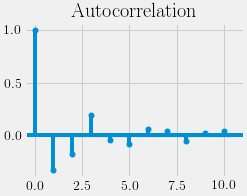

In [117]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,10))
    plot_acf(df_all["price"].diff().dropna(),lags=10)
    fig_file = os.path.join(save_dir, "02-acf.png")
    plt.savefig(fig_file, dpi=600, bbox_inches='tight', pad_inches=0.2)
    plt.savefig(fig_file.replace('.png', '.tif'), dpi=600, bbox_inches='tight', pad_inches=0.2,
                pil_kwargs={"compression": "tiff_lzw"})
    plt.savefig(fig_file.replace('.png', '.svg'), format='svg', bbox_inches='tight', pad_inches=0.2)
    plt.show()

<Figure size 1296x720 with 0 Axes>

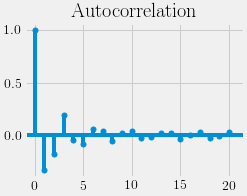

In [111]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,10))
    plot_acf(df_all['price'].diff().dropna().values,lags=20)
    fig_file = os.path.join(save_dir, "02-acf.png")
    plt.savefig(fig_file, dpi=600, bbox_inches='tight', pad_inches=0.2)
    plt.savefig(fig_file.replace('.png', '.tif'), dpi=600, bbox_inches='tight', pad_inches=0.2,
                pil_kwargs={"compression": "tiff_lzw"})
    plt.savefig(fig_file.replace('.png', '.svg'), format='svg', bbox_inches='tight', pad_inches=0.2)
    plt.show()

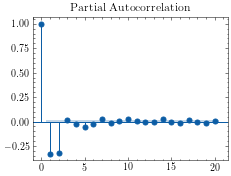

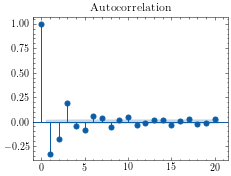

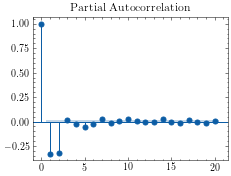

In [110]:

plot_pacf(df_all['price'].diff().dropna().values,lags=20)

In [37]:
window_size = 5

### Midprice cariance

In [144]:
def Midprice_variance(df,w=5,col = "price"):
    temp = df[col]
    for i in range(1,w):
        temp= temp+df[col].shift(i)
    temp = temp/w
    return temp
    
    

In [145]:
Midprice_variance(df_all,w = window_size).head(7)

timestamp
2022-05-31 01:02:51.096000+00:00        NaN
2022-05-31 01:05:06.391000+00:00        NaN
2022-05-31 01:05:33.394000+00:00        NaN
2022-05-31 01:05:47.096000+00:00        NaN
2022-05-31 01:05:55.858000+00:00    31553.3
2022-05-31 01:07:04.934000+00:00    31557.8
2022-05-31 01:07:47.576000+00:00    31550.3
Name: price, dtype: float64

### Signed trade size variance

In [140]:
df_all["signed_side"] = df_all["side"].apply(lambda x: 1 if x == "Buy" else -1)

In [141]:
df_all["signed_side"]

timestamp
2022-05-31 01:02:51.096000+00:00    1
2022-05-31 01:05:06.391000+00:00    1
2022-05-31 01:05:33.394000+00:00   -1
2022-05-31 01:05:47.096000+00:00   -1
2022-05-31 01:05:55.858000+00:00   -1
                                   ..
2022-06-03 23:59:15.103000+00:00   -1
2022-06-03 23:59:15.103000+00:00   -1
2022-06-03 23:59:15.103000+00:00   -1
2022-06-03 23:59:15.103000+00:00   -1
2022-06-03 23:59:47.481000+00:00    1
Name: signed_side, Length: 11639, dtype: int64

In [146]:
def Signed_trade_size_variance(df,w=5,col = "size"):
    temp = df[col]*df[col]
    for i in range(1,w):
        temp= temp+df[col].shift(i)*df["signed_side"].shift(i)
    temp = temp/w
    return temp

### Bid–ask imbalance

In [162]:
df_all.columns

Index(['date', 'time', 'symbol', 'side', 'size', 'price', 'tickDirection',
       'trdMatchID', 'grossValue', 'homeNotional', 'foreignNotional', 'Bid0',
       'Bid1', 'Bid2', 'Bid3', 'Bid4', 'Bid5', 'Bid6', 'Bid7', 'Bid8', 'Bid9',
       'Bidsize0', 'Bidsize1', 'Bidsize2', 'Bidsize3', 'Bidsize4', 'Bidsize5',
       'Bidsize6', 'Bidsize7', 'Bidsize8', 'Bidsize9', 'Ask0', 'Ask1', 'Ask2',
       'Ask3', 'Ask4', 'Ask5', 'Ask6', 'Ask7', 'Ask8', 'Ask9', 'Asksize0',
       'Asksize1', 'Asksize2', 'Asksize3', 'Asksize4', 'Asksize5', 'Asksize6',
       'Asksize7', 'Asksize8', 'Asksize9', 'signed_side'],
      dtype='object')

In [170]:
def Bid_ask_imbalance(data):
    return (data['Bidsize0']-data['Asksize0'])/(data['Bidsize0']+data['Asksize0'])
    
df_all.apply(Bid_ask_imbalance,axis = 1)

timestamp
2022-05-31 01:02:51.096000+00:00         NaN
2022-05-31 01:05:06.391000+00:00    0.969231
2022-05-31 01:05:33.394000+00:00    0.969231
2022-05-31 01:05:47.096000+00:00    0.968750
2022-05-31 01:05:55.858000+00:00    0.967742
                                      ...   
2022-06-03 23:59:15.103000+00:00   -0.997543
2022-06-03 23:59:15.103000+00:00   -0.997543
2022-06-03 23:59:15.103000+00:00   -0.997543
2022-06-03 23:59:15.103000+00:00   -0.997543
2022-06-03 23:59:47.481000+00:00   -0.997543
Length: 11639, dtype: float64

In [171]:
def Bid_ask_imbalance_muti(data):
    bid = sum(data[f'Bidsize{i}'] for i in range(10))
    ask = sum(data[f'Asksize{i}'] for i in range(10))
    print((bid-ask)/(bid+ask))
    print("ok")
    return (bid-ask)/(bid+ask)
    
df_all.apply(Bid_ask_imbalance_muti,axis = 1)

nan
ok
-0.24541691306918983
ok
-0.1503717678393075
ok
-0.1505937187881478
ok
-0.15103762068582843
ok
-0.1867368025549502
ok
-0.1867368025549502
ok
-0.3104265402843602
ok
-0.3104265402843602
ok
-0.3104265402843602
ok
-0.1686214189578927
ok
0.28952088137330256
ok
0.3790322580645161
ok
0.3790322580645161
ok
0.4488658973338639
ok
0.4488658973338639
ok
0.4488658973338639
ok
0.4490994128769032
ok
0.6085147247119078
ok
0.6085147247119078
ok
0.6085147247119078
ok
0.671236595629157
ok
0.671236595629157
ok
0.671236595629157
ok
0.671512022822986
ok
0.7151943462897526
ok
0.7151943462897526
ok
0.7158006362672322
ok
0.7158006362672322
ok
0.32515036209647724
ok
0.382541287495787
ok
0.40743935309973045
ok
0.40743935309973045
ok
0.40743935309973045
ok
0.40743935309973045
ok
0.7284229552643471
ok
0.7284229552643471
ok
0.7284229552643471
ok
0.7284229552643471
ok
0.5126506024096386
ok
0.2918327974276527
ok
0.5599415204678363
ok
0.6349302607640994
ok
0.21595441595441595
ok
0.07164790174002048
ok
0.05071393

timestamp
2022-05-31 01:02:51.096000+00:00         NaN
2022-05-31 01:05:06.391000+00:00   -0.245417
2022-05-31 01:05:33.394000+00:00   -0.150372
2022-05-31 01:05:47.096000+00:00   -0.150594
2022-05-31 01:05:55.858000+00:00   -0.151038
                                      ...   
2022-06-03 23:59:15.103000+00:00   -0.832680
2022-06-03 23:59:15.103000+00:00   -0.832680
2022-06-03 23:59:15.103000+00:00   -0.832680
2022-06-03 23:59:15.103000+00:00   -0.832680
2022-06-03 23:59:47.481000+00:00   -0.350863
Length: 11639, dtype: float64

### Bid And Ask Imbalance

In [172]:
def Bid_imbalance(data,split_num = 5):
    bid_top = sum(data[f'Bidsize{i}'] for i in range(split_num))
    bid_bottom = sum(data[f'Bidsize{i}'] for i in range(split_num,10))
    
    return (bid_top-bid_bottom)/(bid_top+bid_bottom)
    
df_all.apply(Bid_imbalance,axis = 1)

timestamp
2022-05-31 01:02:51.096000+00:00         NaN
2022-05-31 01:05:06.391000+00:00   -0.375131
2022-05-31 01:05:33.394000+00:00   -0.375131
2022-05-31 01:05:47.096000+00:00   -0.375490
2022-05-31 01:05:55.858000+00:00   -0.376209
                                      ...   
2022-06-03 23:59:15.103000+00:00   -0.818182
2022-06-03 23:59:15.103000+00:00   -0.818182
2022-06-03 23:59:15.103000+00:00   -0.818182
2022-06-03 23:59:15.103000+00:00   -0.818182
2022-06-03 23:59:47.481000+00:00   -0.964329
Length: 11639, dtype: float64

In [173]:
def Ask_imbalance(data,split_num = 5):
    ask_top = sum(data[f'Asksize{i}'] for i in range(split_num))
    ask_bottom = sum(data[f'Asksize{i}'] for i in range(split_num,10))
    
    return (ask_top-ask_bottom)/(ask_top+ask_bottom)
    
df_all.apply(Ask_imbalance,axis = 1)

timestamp
2022-05-31 01:02:51.096000+00:00         NaN
2022-05-31 01:05:06.391000+00:00    0.262741
2022-05-31 01:05:33.394000+00:00    0.102450
2022-05-31 01:05:47.096000+00:00    0.102623
2022-05-31 01:05:55.858000+00:00    0.102970
                                      ...   
2022-06-03 23:59:15.103000+00:00   -0.429326
2022-06-03 23:59:15.103000+00:00   -0.429326
2022-06-03 23:59:15.103000+00:00   -0.429326
2022-06-03 23:59:15.103000+00:00   -0.429326
2022-06-03 23:59:47.481000+00:00   -0.341081
Length: 11639, dtype: float64

### Volume_Order_Imbalance

In [38]:
for j in range(1,2):
    for i in range(10):
        df_all[f"Bid{i}lag{j}"] = df_all[f"Bid{i}"].shift(1)
        df_all[f"Ask{i}lag{j}"] = df_all[f"Ask{i}"].shift(1)

/home/image003/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/image003/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [39]:
df_all.columns

Index(['date', 'time', 'symbol', 'side', 'size', 'price', 'tickDirection',
       'trdMatchID', 'grossValue', 'homeNotional', 'foreignNotional', 'Bid0',
       'Bid1', 'Bid2', 'Bid3', 'Bid4', 'Bid5', 'Bid6', 'Bid7', 'Bid8', 'Bid9',
       'Bidsize0', 'Bidsize1', 'Bidsize2', 'Bidsize3', 'Bidsize4', 'Bidsize5',
       'Bidsize6', 'Bidsize7', 'Bidsize8', 'Bidsize9', 'Ask0', 'Ask1', 'Ask2',
       'Ask3', 'Ask4', 'Ask5', 'Ask6', 'Ask7', 'Ask8', 'Ask9', 'Asksize0',
       'Asksize1', 'Asksize2', 'Asksize3', 'Asksize4', 'Asksize5', 'Asksize6',
       'Asksize7', 'Asksize8', 'Asksize9', 'Bid0lag1', 'Ask0lag1', 'Bid1lag1',
       'Ask1lag1', 'Bid2lag1', 'Ask2lag1', 'Bid3lag1', 'Ask3lag1', 'Bid4lag1',
       'Ask4lag1', 'Bid5lag1', 'Ask5lag1', 'Bid6lag1', 'Ask6lag1', 'Bid7lag1',
       'Ask7lag1', 'Bid8lag1', 'Ask8lag1', 'Bid9lag1', 'Ask9lag1'],
      dtype='object')

In [40]:
for j in range(1,2):
    for i in range(10):
        df_all[f"Bidsize{i}lag{j}"] = df_all[f"Bidsize{i}"].shift(1)
        df_all[f"Asksize{i}lag{j}"] = df_all[f"Asksize{i}"].shift(1)

/home/image003/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/image003/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:
df_all.columns

Index(['date', 'time', 'symbol', 'side', 'size', 'price', 'tickDirection',
       'trdMatchID', 'grossValue', 'homeNotional', 'foreignNotional', 'Bid0',
       'Bid1', 'Bid2', 'Bid3', 'Bid4', 'Bid5', 'Bid6', 'Bid7', 'Bid8', 'Bid9',
       'Bidsize0', 'Bidsize1', 'Bidsize2', 'Bidsize3', 'Bidsize4', 'Bidsize5',
       'Bidsize6', 'Bidsize7', 'Bidsize8', 'Bidsize9', 'Ask0', 'Ask1', 'Ask2',
       'Ask3', 'Ask4', 'Ask5', 'Ask6', 'Ask7', 'Ask8', 'Ask9', 'Asksize0',
       'Asksize1', 'Asksize2', 'Asksize3', 'Asksize4', 'Asksize5', 'Asksize6',
       'Asksize7', 'Asksize8', 'Asksize9', 'Bid0lag1', 'Ask0lag1', 'Bid1lag1',
       'Ask1lag1', 'Bid2lag1', 'Ask2lag1', 'Bid3lag1', 'Ask3lag1', 'Bid4lag1',
       'Ask4lag1', 'Bid5lag1', 'Ask5lag1', 'Bid6lag1', 'Ask6lag1', 'Bid7lag1',
       'Ask7lag1', 'Bid8lag1', 'Ask8lag1', 'Bid9lag1', 'Ask9lag1',
       'Bidsize0lag1', 'Asksize0lag1', 'Bidsize1lag1', 'Asksize1lag1',
       'Bidsize2lag1', 'Asksize2lag1', 'Bidsize3lag1', 'Asksize3lag1',
       'Bi